In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

## Coin flip example

We have to flip 5 coins to get heads or tails. We want to report back the total number of heads and the total number of tails. We want to know whether our experiment matches our prediction.

How do we do this? Define **`heads = 1`** and **`tails = 0`**. Now we can talk to the computer. Now what?

*Google:* `random uniform 0 1 integers python`

Google tells me to use **`np.random.randint`**. Let us try that:

In [4]:
draw = np.random.randint(2, size=5) # Google suggested this
heads_count = len(draw[np.where(draw == 1)])
tails_count = len(draw[(np.where(draw == 0))])
print(heads_count, tails_count) # Does the answer make sense?

1 4


So we have flipped a set of 5 coins once and we count heads and tails. Can we infer the probability of getting 0 heads from flipping 5 coins? How about 5 heads? How about 1,2,3 or 4 heads? What do we need to do?

Add a for loop and flip the set of 5 coins 10 times:

In [5]:
for i in range(0,10):
    draw = np.random.randint(2, size=5)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    print(heads_count, tails_count)

3 2
3 2
4 1
2 3
4 1
4 1
3 2
2 3
3 2
4 1


Now, how many 0s? 1s? 2s? 3s? 4s? 5s? Make this easier.....

In [6]:
counts = np.zeros(6)
print(counts)
for i in range(0,10):
    draw = np.random.randint(2, size=5)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] + 1
    print(counts)

[0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0.]
[1. 0. 1. 0. 1. 0.]
[1. 0. 1. 0. 2. 0.]
[1. 0. 1. 1. 2. 0.]
[1. 0. 2. 1. 2. 0.]
[1. 0. 2. 2. 2. 0.]
[1. 1. 2. 2. 2. 0.]
[1. 2. 2. 2. 2. 0.]
[1. 2. 2. 3. 2. 0.]


We need **a lot** more flips of the set of 5 coins. Try 100.

[0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 1. 0.]
[1. 1. 0. 0. 1. 0.]
[1. 2. 0. 0. 1. 0.]
[1. 2. 0. 1. 1. 0.]
[1. 2. 1. 1. 1. 0.]
[1. 2. 2. 1. 1. 0.]
[1. 2. 3. 1. 1. 0.]
[1. 2. 4. 1. 1. 0.]
[1. 3. 4. 1. 1. 0.]
[1. 3. 5. 1. 1. 0.]
[1. 3. 5. 1. 2. 0.]
[1. 4. 5. 1. 2. 0.]
[1. 4. 5. 2. 2. 0.]
[1. 4. 5. 2. 3. 0.]
[1. 4. 5. 3. 3. 0.]
[1. 5. 5. 3. 3. 0.]
[1. 5. 5. 4. 3. 0.]
[1. 5. 6. 4. 3. 0.]
[1. 5. 6. 5. 3. 0.]
[1. 5. 6. 6. 3. 0.]
[1. 6. 6. 6. 3. 0.]
[1. 6. 7. 6. 3. 0.]
[2. 6. 7. 6. 3. 0.]
[2. 6. 8. 6. 3. 0.]
[2. 7. 8. 6. 3. 0.]
[2. 7. 8. 6. 4. 0.]
[2. 7. 8. 6. 4. 1.]
[2. 7. 8. 7. 4. 1.]
[2. 7. 8. 8. 4. 1.]
[2. 7. 8. 9. 4. 1.]
[2. 7. 9. 9. 4. 1.]
[ 2.  7.  9. 10.  4.  1.]
[ 2.  7. 10. 10.  4.  1.]
[ 2.  7. 10. 10.  5.  1.]
[ 2.  7. 10. 11.  5.  1.]
[ 2.  7. 10. 12.  5.  1.]
[ 2.  7. 10. 13.  5.  1.]
[ 2.  7. 11. 13.  5.  1.]
[ 2.  8. 11. 13.  5.  1.]
[ 2.  8. 12. 13.  5.  1.]
[ 2.  9. 12. 13.  5.  1.]
[ 2.  9. 12. 14.  5.  1.]
[ 2.  9. 12. 15.  5.  1.]
[ 2.  9. 13. 15.  5.  1.]
[ 

<BarContainer object of 6 artists>

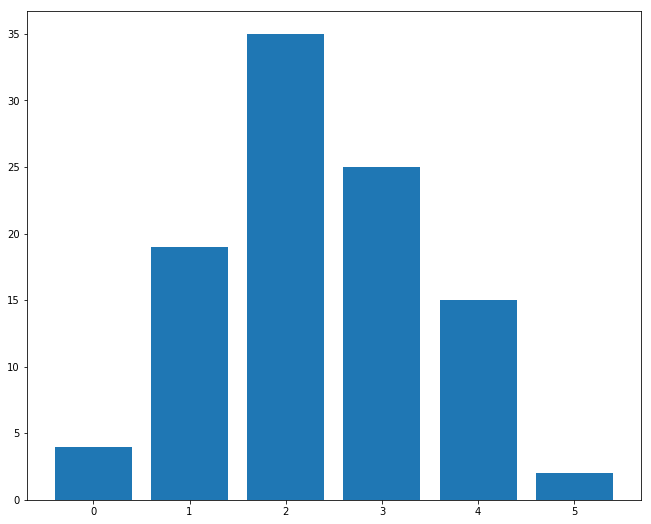

In [7]:
counts = np.zeros(6)
print(counts)
for i in range(0,100):
        draw = np.random.randint(2, size=5)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
        print (counts)
plt.bar(np.arange(6), counts)

## The Binomial Theorem 

Now, over plot a theory curve, which is a representation of the binomial series for p=0.5 (general binomial distribution is slightly different!):
$P(x=n) = \frac{N!}{n!(N-n)!}p^N$

What is $n$? $N$? 

$N$ is the total number of coins being flipped.
$n$ is the number of heads you observe.

In [8]:
from scipy.misc import factorial
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
print(PNx(5))

[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  """


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  """


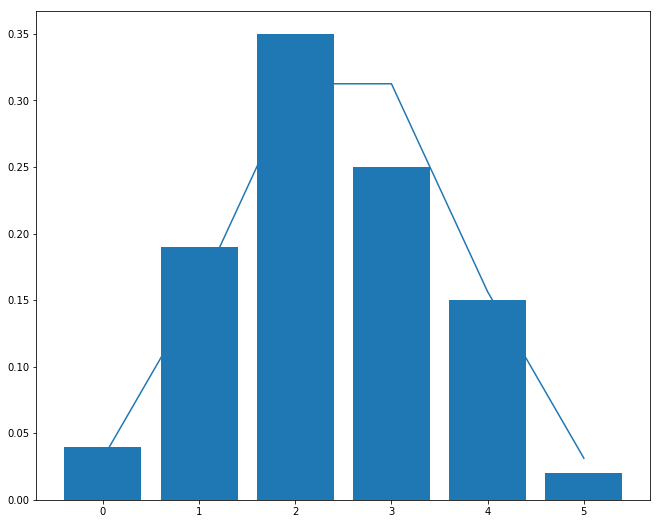

In [9]:
plt.bar(np.arange(6), counts/100.0)
plt.plot(np.arange(6), PNx(5))

What did we learn? 

1. How to make an "experiment" in an iPython Notebook (i.e., on a computer).  <font color="crimson">This exercise was a computer simulation!</font>

2. Analytic statistical theory makes sense in the limit of large $N$.  <font color ="crimson"> What do we do when N is small?</font>

How about we have a little fun and make a movie, this time flipping 10 coins. Our story is to watch as the observed binomial theory converges on the theoretical binomial theorem. How many frames do we need (where each frame includes an additional role of the 10 coins) before life imitates "theory"?

*Note: The following cell may take around a minute to compute*

/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  """
/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  """


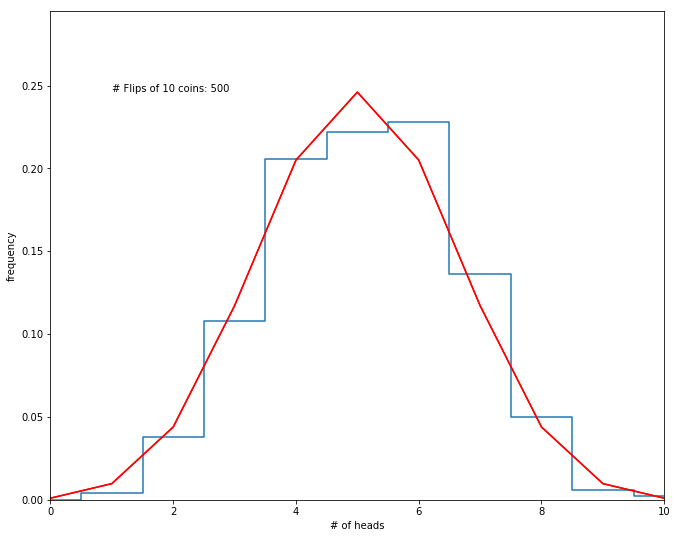

In [10]:
N_coins = 10

# First set up the figure, the axis, and the plot element we want to animate
PN_mid = max(PNx(N_coins))
fig = plt.figure()
ax = plt.axes(xlim=(0, N_coins), ylim=(0, PN_mid*1.2))
line, = ax.plot(np.arange(N_coins+1), np.zeros(N_coins+1), drawstyle="steps-mid")

# initialization function: plot the background of each frame
def init():
    plt.plot(np.arange(N_coins+1), PNx(N_coins), color="red")
    line.set_data(np.arange(N_coins+1), np.zeros(N_coins+1))
    plt.xlabel("# of heads")
    plt.ylabel("frequency")
    return line,

# animation function.  This is called sequentially
def count_fun(i):
    flips_per_frame = 5
    counts = np.zeros(N_coins+1)
    j = (i+1)*flips_per_frame
    for k in range(j):
        draw = np.random.randint(2, size=N_coins)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
    x = np.linspace(0, N_coins, N_coins+1)
    y = counts/j
    line.set_data(x, y)
    ax.annotate("# Flips of {} coins: {}".format(N_coins, j),
                xy=(2, PN_mid), xytext=(1, PN_mid), backgroundcolor='w')
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, count_fun, init_func=init,
                               frames=100, interval=200, blit=True)

anim

In [11]:
#Exercise 1
from scipy.misc import factorial
def prob (coins):
    trials = 100000
    counts = np.zeros(coins+1)
    for i in range(0,trials):
        draw = np.random.randint(2, size=coins)
        heads_count = len(draw[(np.where(draw == 1))])
        counts[heads_count] = counts[heads_count] + 1
    probability = np.zeros(coins+1)
    for i in range(0,coins+1):
        probability[i] = counts[i]/trials
    return probability

/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


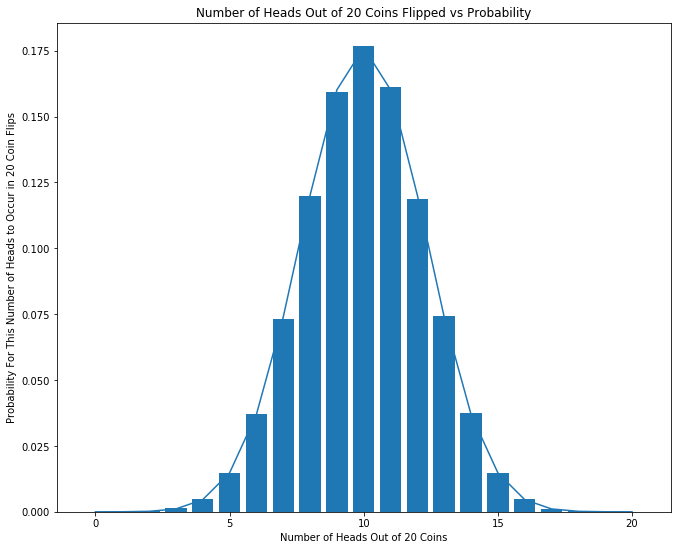

In [12]:
# Exercise 1a
# We average over a large number of realizations by taking the number of times that 
# the number of heads occured and then dividing that value by the total number of coin flips.
# M should be very large to get a smooth graph. I use an M of 100,000

# Exercise 1b
# The variable "counts" counts how many occurances of a certain number of head occur. The variable 
# "probability" is the probability of each number of occurance.
# The inputs of my function are the number of coins that I wish to use and the number of times I 
# wish to flip those coins.
# My function returns the probability by dividing the number of successes by the population size.
# I used the vaiables "draw" and "head_counts" as intermediate values.

# Exercise 1c
# The "trials" varaiable is an arbitrary value chosen by me. The specific number of 5000 was 
# chosen so i would have a total of 100,000 coins flipped.
# The "coins" variable was givien in part d of the first exercise.
# The "probability" array was determined by dividing each value in the counts array by the
# total number of times we flipped 20 coins. This was determined using the function I wrote for exercise 1.
# Throughout the process, i will need a couple for loops. These variables were used to keep track of the 
# outcome of the coin, and the information was no longer needed once the "counts" array was finished, so it 
# was not returned. Once the "probability" array was made, counts is also no longer needed, so it is not returned.

# Exercise 1d
coins = 20
probability = prob(coins)

plt.bar(np.arange(coins+1), probability)
plt.title('Number of Heads Out of 20 Coins Flipped vs Probability')
plt.xlabel('Number of Heads Out of 20 Coins')
plt.ylabel('Probability For This Number of Heads to Occur in 20 Coin Flips')
# The peak of my distribution is around 10 heads. That is exactly what I expected becasue the expected
# result is 50% heads and 50% tails, and applying this logic to 20 coins results in 10 occurances of heads.

# Exercise 1e
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p)**N)
    return PNx
plt.plot(np.arange(coins+1), PNx(coins))

In [13]:
# Eercise 1f

# This block of code is a function that determines the expected value.
def expected_value(N):
    exp_val = 0
    p = prob(N)
    for i in range(0, N+1):
        exp_val += (i * p[i])
    return exp_val
print("Calculating the expected value for N=20:")
print(expected_value(20))
print("Compare to the Calculated Mean (N*p, 20*0.5):")
print(20*0.5)
print("Calculating the expected value for N=40:")
print(expected_value(40))
print("Compare to the Calculated Mean (N*p, 40*0.5):")
print(40*0.5)
print("The expected value is very close to the mean calculated")

Calculating the expected value for N=20:
10.00434
Compare to the Calculated Mean (N*p, 20*0.5):
10.0
Calculating the expected value for N=40:
20.01075000000001
Compare to the Calculated Mean (N*p, 40*0.5):
20.0
The expected value is very close to the mean calculated


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


Variance of Possion Distribution:  0.99688
Mean Value of Possion Distribution:  1.0017
Using the Probability of Heads at:  0.01


Text(0, 0.5, 'Variance (Blue) and Mean (Red)')

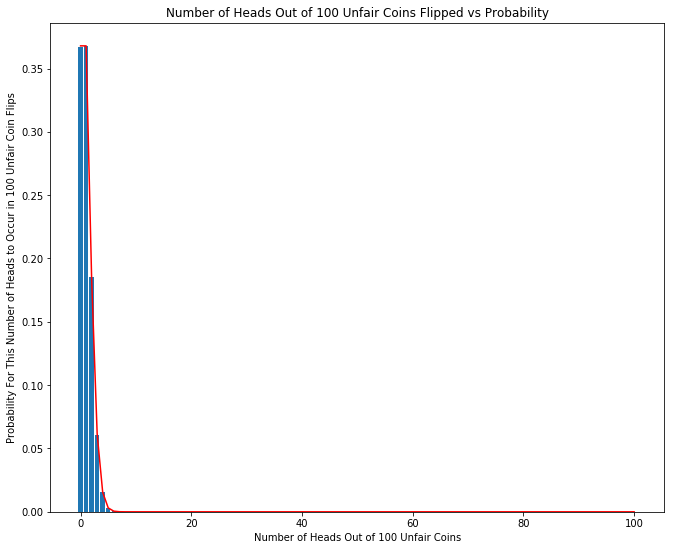

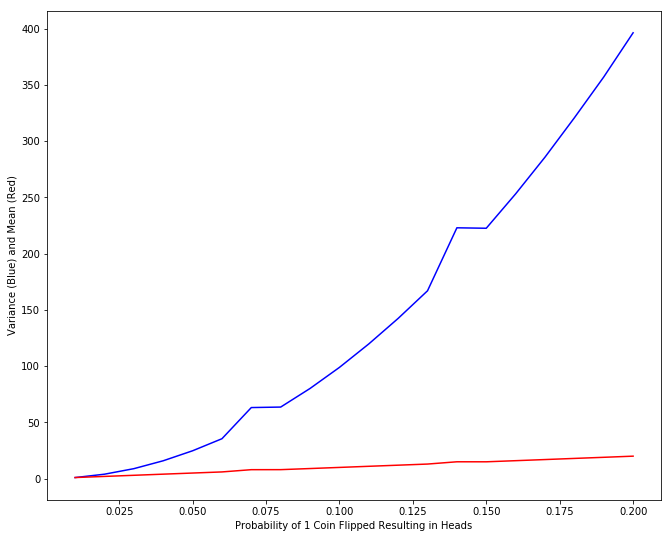

In [15]:
# Exercise 2
import math

# This block of code adjusts the function written in exercise 1 to take in a variable probability of success.

# Exercise 2b
def var_prob (coins, p):
    trials = 100000
    counts = np.zeros(coins+1)
    for i in range(0,trials):
        draw = np.random.randint(100, size=coins)
        heads_count = len(draw[(np.where(draw < 100*p))])
        counts[heads_count] = counts[heads_count] + 1
    probability = np.zeros(coins+1)
    for i in range(0,coins+1):
        probability[i] = counts[i]/trials
    return probability

coins = 100
p = 0.01 # p << 1
probability = var_prob(coins, p)

# Exercise 2c
plt.figure(1)
plt.bar(np.arange(coins+1), probability)
plt.title('Number of Heads Out of 100 Unfair Coins Flipped vs Probability')
plt.xlabel('Number of Heads Out of 100 Unfair Coins')
plt.ylabel('Probability For This Number of Heads to Occur in 100 Unfair Coin Flips')

def var_PNx(N, p1):
    x = (np.arange(N+1))
    v1 = (N*p1)**x
    v2 = (math.e)**((-1)*(N*p1))
    v3 = factorial(x)
    PNx = (v1*v2)/v3
    return PNx

def gauss_PNx(N, p2):
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p2)**N)
    return PNx

plt.plot(np.arange(coins+1), var_PNx(coins, p), 'r')

def var(N,ps):
    exp_val_1 = 0
    for i in range(0, N+1):
        exp_val_1 += ((i**2) * ps[i])
    exp_val_2 = 0
    for j in range(0, N+1):
        exp_val_2 += (j * ps[j])
    return (exp_val_1 - exp_val_2)

def mean(N,p2):
    mean = 0
    for i in range(0, N+1):
        mean += (i * p2[i])
    return mean

print("Variance of Possion Distribution: ", var(coins, probability))
print("Mean Value of Possion Distribution: ", mean(coins, probability))
print("Using the Probability of Heads at: ", p)
# These values are what I was expecting.

# Exercise 2d

# This code is used to determine the differnce between variance and mean at different probabilities.
coins = 100
vari = np.zeros(20)
means = np.zeros(20)
p_vals = np.arange(1,21)/100
for i in range(0, 20):
    probab = var_prob(coins, p_vals[i])
    vari[i] = var(coins, probab)
    means[i] = mean(coins, probab)

plt.figure(2)
plt.plot(p_vals, vari, 'b')
plt.plot(p_vals, means, 'r')
plt.xlabel("Probability of 1 Coin Flipped Resulting in Heads")
plt.ylabel("Variance (Blue) and Mean (Red)")